<a href="https://colab.research.google.com/github/RamazanYozgyur/Covid-Denmark/blob/main/RY_BTC_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**LOAD THE DATASETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classes = pd.read_csv('/content/drive/My Drive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')

In [ ]:
edgelist = pd.read_csv('/content/drive/My Drive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

In [ ]:
features = pd.read_csv('/content/drive/My Drive/elliptic_bitcoin_dataset/elliptic_txs_features.csv',header=None)

**DESCRİPTİVE ANALYSİS**

In [ ]:
classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [ ]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
classes.value_counts()

txId       class  
1076       unknown    1
225295249  unknown    1
225295260  unknown    1
225295503  unknown    1
225295506  unknown    1
                     ..
96381166   unknown    1
96381175   unknown    1
96381589   unknown    1
96382039   unknown    1
403244581  unknown    1
Name: count, Length: 203769, dtype: int64

In [ ]:
classes.txId.nunique(),classes["class"].nunique()

(203769, 3)

In [ ]:
classes["class"].unique()

array(['unknown', '2', '1'], dtype=object)

In [ ]:
edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [ ]:
edgelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


In [ ]:
edgelist.nunique()

txId1    166345
txId2    148447
dtype: int64

In [ ]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, 0 to 166
dtypes: float64(165), int64(2)
memory usage: 259.6 MB


In [ ]:
features.shape

(203769, 167)

In [ ]:
features[1].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
features.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166],
      dtype='int64', length=167)

In [ ]:
edgelist.duplicated().sum()#check if we have any same rows

0

**VİSUALİZATİONS**

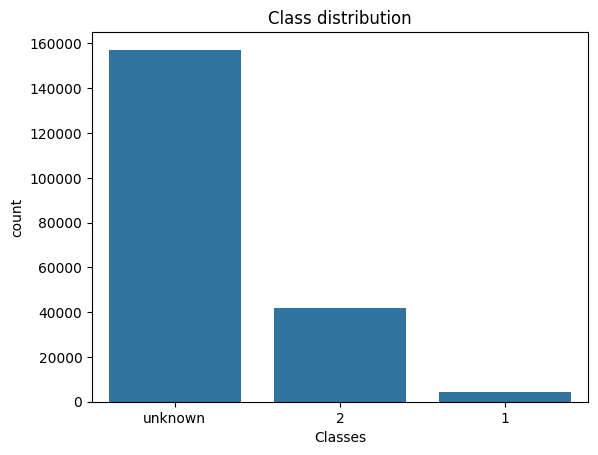

In [ ]:
#how many class do we have and what kind of distrubition
sns.countplot(data=classes,x="class")
plt.title("Class distribution")
plt.xlabel("Classes")
plt.show()

In [ ]:
e=list(features[1].value_counts().index)


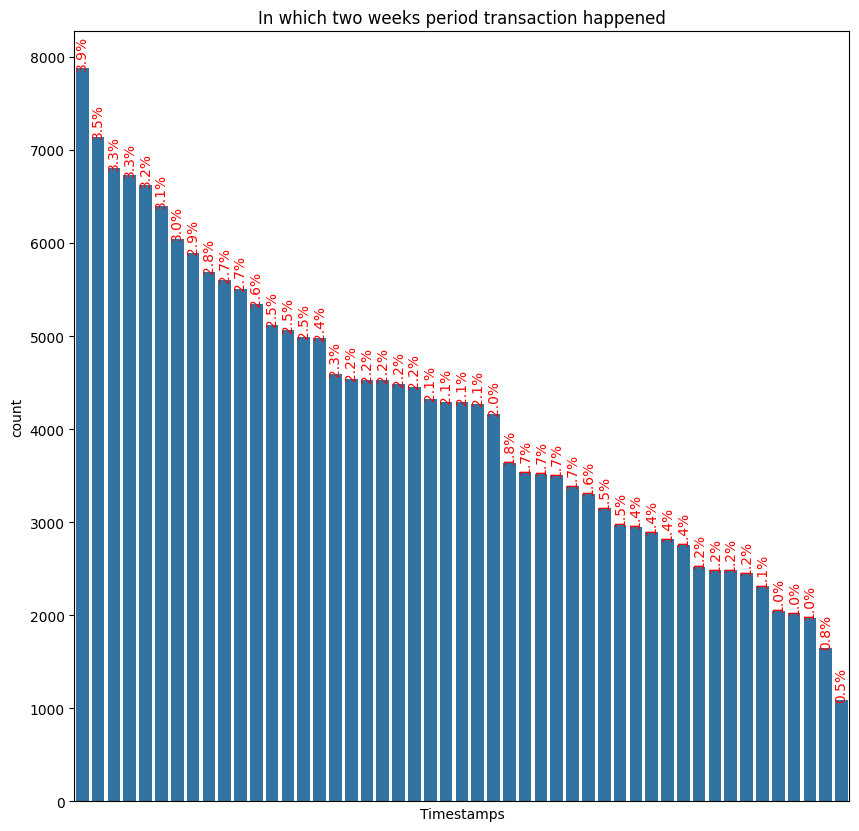

In [ ]:
# visulization of transection percentage based on timestamps

features.rename(columns={1:"col_1"},inplace=True) # 1 is not working  as columns names in this graph so I just change it for now.

total = features.shape[0]
plt.figure(figsize=(10,10))
ax=sns.countplot(data=features,x="col_1",order=e)
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    ax.text(p.get_x() + p.get_width() / 2.,
            height +15.5,  # Add some vertical padding
            '{:.1f}%'.format((height / total) * 100),  # Calculate percentage and format
            ha="center", rotation=90,color="red")
plt.xticks([],rotation=90)
plt.xlabel("Timestamps")
plt.title("In which two weeks period transaction happened")
plt.show()

In [ ]:
#Merge two tables features and classes on ID
fet_clas=pd.merge(features,classes,how="left",left_on=0,right_on="txId")
fet_clas.drop(columns=["txId"],inplace=True)

In [ ]:
#change column 0 and column 1 name
fet_clas.rename(columns={0:"txid","col_1":"timestamps"},inplace=True)

In [ ]:
#change column names
column_ren={i:f"col_{i-1}" for i in fet_clas.columns[2:-1]}

In [ ]:
fet_clas.rename(columns=column_ren,inplace=True)

In [ ]:
fet_clas.head()

,txid,timestamps,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown


In [ ]:
#check what kind of values we have
list(fet_clas.iloc[1,:])

[5530458,
 1,
 -0.1714842106943225,
 -0.1846675514329143,
 -1.2013688016765636,
 -0.1219695997591005,
 -0.0438745479173489,
 -0.1130020092847624,
 -0.0615837940730322,
 -0.1621120662667747,
 -0.1679480789436863,
 -0.0497069643940398,
 -0.1644174227127407,
 -0.0287412858566647,
 -0.0353905526008135,
 -0.0429552992580282,
 -0.0132816148700588,
 -0.0553269620874102,
 -0.169757320830082,
 -0.1714766618438403,
 -0.1744902123939215,
 0.8870578724766534,
 0.8845565252702963,
 -0.1397312084010579,
 -0.1489118911800289,
 -0.0801472696533522,
 -0.1556614298173464,
 -0.010763009512837,
 -0.0121074517774784,
 -0.139733008128884,
 -0.148907190231037,
 -0.0801467358465918,
 -0.1556613997952201,
 -0.0106685610738475,
 -0.0120051821184178,
 -0.0246688306562535,
 -0.0312723904866303,
 -0.0230451563960962,
 -0.0262146551774309,
 0.0014278137097094,
 0.0014826437872997,
 -0.2272154464478222,
 -0.2393683687143703,
 -0.0752555315462277,
 -0.2349515175665409,
 0.0374680287743863,
 0.0434442213339417,
 -0.22

In [ ]:
#calculate the rate of illicit/licit
a=fet_clas.groupby("timestamps").apply(lambda x: round((x[x["class"]=="1"].count())/(x[x["class"]=="2"].count()),2))["txid"]

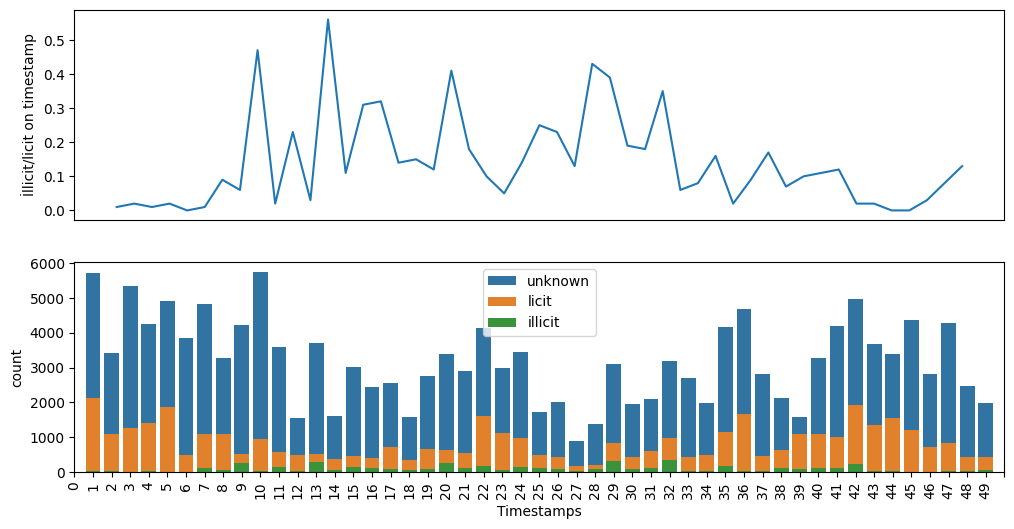

In [ ]:
#hue_order=["unknown","1","2"]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.lineplot(data=a,ax=axes[0])
#plt.figure(figsize=(10,10))
#plt.title("Rate of illicit/licit on timestamp")
axes[0].set_ylabel("İllicit/licit on timestamp")
axes[0].set_xlabel("")
axes[0].set_xticks([])


#plt.figure(figsize=(10,10
sns.countplot(data=fet_clas,x="timestamps",hue="class",dodge=False,ax=axes[1])
axes[1].legend(title="",labels=["unknown","licit","illicit"])
#axes[1].set_xlabel("")




tick_positions = range(-1,50)  # Include empty ticks at 0 and 50
tick_labels = list(range(0,50))+[""]

axes[1].set_xticks(tick_positions)
axes[1].set_xticklabels(tick_labels)
axes[1].set_xlabel("Timestamps")

plt.xticks(rotation=90)
plt.show()

**PREPARATİON FOR OTHER VİSUALİZATİONS**

In [ ]:
#drop unknown class
fet_clas=fet_clas[fet_clas["class"]!="unknown"]
fet_clas.head()

,txid,timestamps,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2


In [ ]:
fet_clas[fet_clas["class"]=="2"].shape

(42019, 168)

In [ ]:
fet_clas[fet_clas["class"]=="1"].shape

(4545, 168)

In [ ]:
#calculate mean of columns based on timestamps where class is licit
a=fet_clas[fet_clas["class"]=="2"].groupby("timestamps").mean()
a.iloc[:,1:].head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
timestamps,,,,,,,,,,,,,,,,,,,,,
1,-0.104685,-0.144772,-0.951231,0.304511,0.089643,0.276150,0.055420,-0.137062,-0.114987,0.139952,...,-0.194030,0.080753,0.083238,-0.008070,0.054401,0.031998,-0.023368,0.076905,0.075792,inf
2,-0.085842,-0.152802,-0.624156,0.070165,0.189070,0.081812,-0.014237,-0.108198,-0.085512,0.181929,...,0.043070,0.081070,0.080383,-0.005602,0.075734,-0.069501,-0.078434,0.046592,0.048556,inf
3,-0.147065,-0.156459,-0.837647,0.059766,-0.036032,0.066561,-0.001589,-0.155229,-0.148742,0.044525,...,-0.159189,0.169968,0.172039,0.000723,-0.068220,-0.092526,-0.075452,-0.178823,-0.178123,inf
4,-0.138179,-0.126129,-0.654642,0.197658,-0.024658,0.170226,0.106534,-0.148749,-0.137797,0.074806,...,-0.015665,0.054356,0.057822,0.005150,0.000097,-0.027057,-0.023772,0.077859,0.082695,inf
5,-0.094229,-0.152872,-0.898996,0.043201,-0.000605,0.056870,-0.036578,-0.107037,-0.099374,0.057271,...,0.090878,-0.085447,-0.081749,0.017529,-0.038136,-0.059495,-0.041560,0.183288,0.185107,inf


In [ ]:
#calculate mean of columns based on timestamps where class is illicit

b=fet_clas[fet_clas["class"]=="1"].groupby("timestamps").mean()

In [ ]:
#pd.options.display.float_format = '{:,.2f}'.format
m=fet_clas.iloc[:,2:-1].mean()


In [ ]:
m

col_1     -0.052645
col_2      0.159103
col_3      0.148974
col_4      0.172216
col_5      0.028651
             ...   
col_161    0.057301
col_162    0.076348
col_163    0.045520
col_164   -0.037397
col_165   -0.037899
Length: 165, dtype: float64

**VİSUALİZATİONS**

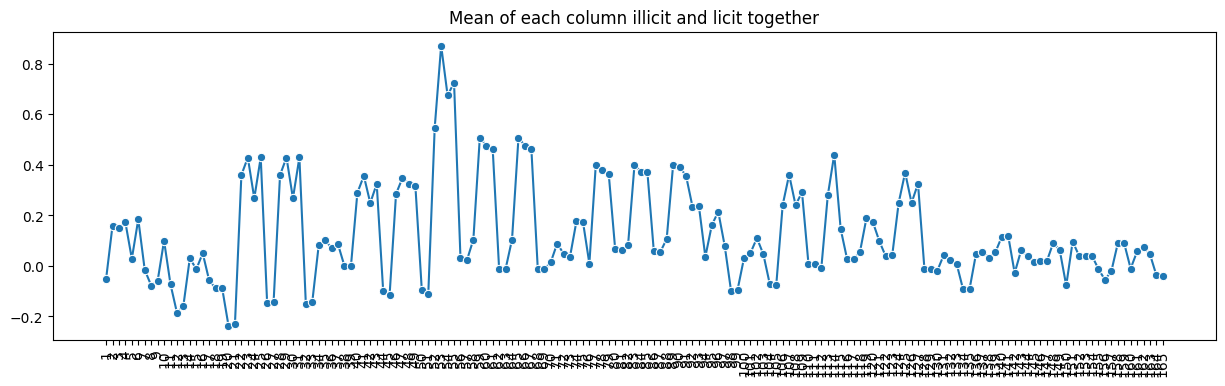

In [ ]:
#visualize mean of columns
plt.figure(figsize=(15,4))
sns.lineplot(data=m,marker="o")
plt.title("Mean of each column illicit and licit together")
plt.xticks(ticks=list(m.index),labels=list(range(1,166)),rotation=90)

plt.show()

In [ ]:
#pd.options.display.float_format = '{:,.2f}'.format
# Get means of differrent classes
n_licit=fet_clas[fet_clas["class"]=="2"].iloc[:,2:-1].mean()
n_illicit=fet_clas[fet_clas["class"]=="1"].iloc[:,2:-1].mean()

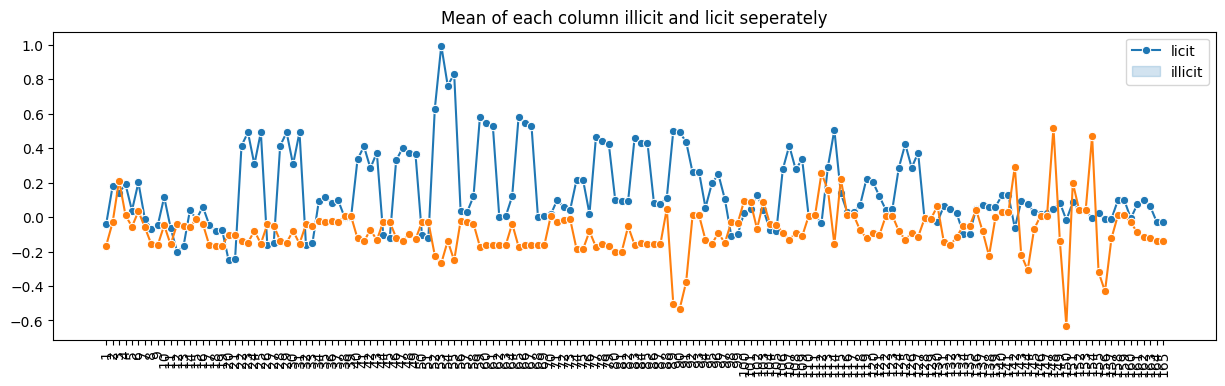

In [ ]:
#visualize it
plt.figure(figsize=(15,4))
sns.lineplot(data=n_licit,marker="o")
sns.lineplot(data=n_illicit,marker="o")
plt.title("Mean of each column illicit and licit seperately")
plt.xticks(ticks=list(n_licit.index),labels=list(range(1,166)),rotation=90)
plt.legend(labels=["licit","illicit"])
plt.show()


**PREPARATİON FOR OTHER VİSUALİZATİONS**


In [ ]:
#calculate standart deviation of class 2
d=fet_clas[fet_clas["class"]=="2"].groupby("timestamps").std()

In [ ]:
#calculate standart deviation of class 1

e=fet_clas[fet_clas["class"]=="1"].groupby("timestamps").std()

In [ ]:
#We will do visualization of difference
l=d-e
l.iloc[:,1:].head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
timestamps,,,,,,,,,,,,,,,,,,,,,
1,0.531343,0.173278,0.268183,2.624942,5.632265,2.432572,0.645888,0.346939,0.461557,1.658353,...,-0.048005,-0.029979,-0.028203,0.030542,5.452469,5.165123,1.877310,0.228947,0.229089,0.0
2,0.249732,0.086930,0.565070,0.581082,1.437973,0.574880,0.435637,0.220218,0.250908,1.230258,...,0.238373,-0.048351,-0.045354,0.008444,1.138210,0.190809,0.050680,0.212654,0.211114,0.0
3,0.114392,-0.002782,0.773709,0.351229,0.031060,0.330111,0.535155,0.065204,0.109431,0.796643,...,-0.576659,0.203875,0.207836,0.123317,0.160698,0.066367,-0.045560,0.093612,0.095590,0.0
4,0.119403,0.100659,0.405835,-0.054321,0.111675,-0.327267,1.188186,0.075331,0.114410,0.824232,...,-0.567036,0.173067,0.177133,0.047024,1.482327,0.822588,0.594219,0.576229,0.574762,0.0
5,0.260260,-0.010053,-0.043893,0.498094,0.390212,0.426455,0.281716,0.238623,0.250185,0.772092,...,0.121748,-0.044204,-0.040900,1.262386,0.502542,0.690601,1.091918,0.929148,0.928386,0.0


In [ ]:
#get rid of unwanted columns
l.reset_index(drop=False,inplace=True)
l.drop(columns="txid",inplace=True)
#l=l.iloc[:,1:]
l.head()

,timestamps,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
0,1,0.531343,0.173278,0.268183,2.624942,5.632265,2.432572,0.645888,0.346939,0.461557,...,-0.048005,-0.029979,-0.028203,0.030542,5.452469,5.165123,1.877310,0.228947,0.229089,0.0
1,2,0.249732,0.086930,0.565070,0.581082,1.437973,0.574880,0.435637,0.220218,0.250908,...,0.238373,-0.048351,-0.045354,0.008444,1.138210,0.190809,0.050680,0.212654,0.211114,0.0
2,3,0.114392,-0.002782,0.773709,0.351229,0.031060,0.330111,0.535155,0.065204,0.109431,...,-0.576659,0.203875,0.207836,0.123317,0.160698,0.066367,-0.045560,0.093612,0.095590,0.0
3,4,0.119403,0.100659,0.405835,-0.054321,0.111675,-0.327267,1.188186,0.075331,0.114410,...,-0.567036,0.173067,0.177133,0.047024,1.482327,0.822588,0.594219,0.576229,0.574762,0.0
4,5,0.260260,-0.010053,-0.043893,0.498094,0.390212,0.426455,0.281716,0.238623,0.250185,...,0.121748,-0.044204,-0.040900,1.262386,0.502542,0.690601,1.091918,0.929148,0.928386,0.0


In [ ]:
#Take transpose to plot easily
l_tr=l.iloc[:,1:].transpose()
l_tr.columns=range(1,50)

In [ ]:
l_tr.head()

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
col_1,0.531343,0.249732,0.114392,0.119403,0.260260,0.176768,0.305358,0.120348,0.143082,0.679302,...,0.585572,0.739544,0.494713,0.379439,0.663514,0.504388,0.201067,0.449009,1.990185,1.961930
col_2,0.173278,0.086930,-0.002782,0.100659,-0.010053,0.743267,0.082131,0.286627,-0.035613,0.302328,...,1.555079,2.266328,2.564435,2.684867,-0.032971,1.595495,-47.398112,3.025820,1.536019,0.731903
col_3,0.268183,0.565070,0.773709,0.405835,-0.043893,0.233450,0.122277,0.754658,0.672835,0.267389,...,0.333441,0.305722,0.346390,0.323640,0.301937,0.475352,-0.262326,0.190951,0.287459,0.331625
col_4,2.624942,0.581082,0.351229,-0.054321,0.498094,1.832589,2.546995,1.148567,1.482459,1.689525,...,2.295955,1.071504,1.383442,0.832037,-1.334453,1.410327,-24.613330,1.282974,1.534476,0.019061
col_5,5.632265,1.437973,0.031060,0.111675,0.390212,0.024004,0.153997,1.063442,1.012845,3.468597,...,0.178358,0.175280,0.115475,0.156296,0.604772,0.287557,0.151364,0.159564,4.435344,0.494820


**VİSUALİZATİON**


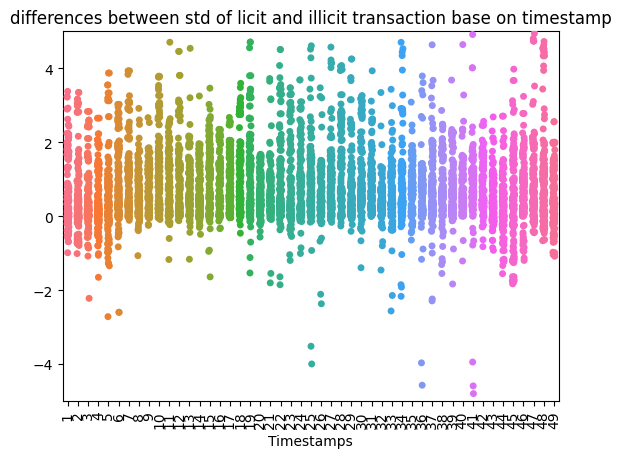

In [ ]:
sns.stripplot(data=l_tr)
plt.ylim(-5,5) # there are some(2) outliners so without them it is better
plt.xticks(rotation=90)
plt.xlabel("Timestamps")
plt.title("differences between std of licit and illicit transaction base on timestamp")
plt.show()

In [ ]:
fet_clas.head()

,txid,timestamps,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2


**DATA PREPARATİON FOR ML**

In [ ]:
# Before going to apply models we need to make preparation.
# Here we would like to have equal number of rows for each classes.
# It is also important to have same number rows of timestamps
# We will do this in the several cells.

In [ ]:
c2=fet_clas[fet_clas["class"]=="2"]

In [ ]:
c1=fet_clas[fet_clas["class"]=="1"]

In [ ]:
di=dict(c1["timestamps"].value_counts()) # get number of each timestamps as dictionary

In [ ]:
di

{32: 342,
 29: 329,
 13: 291,
 20: 260,
 9: 248,
 42: 239,
 35: 182,
 22: 158,
 15: 147,
 24: 137,
 11: 131,
 16: 128,
 25: 118,
 41: 116,
 40: 112,
 38: 111,
 31: 106,
 7: 102,
 21: 100,
 17: 99,
 26: 96,
 28: 85,
 30: 83,
 39: 81,
 19: 80,
 8: 67,
 49: 56,
 23: 53,
 18: 52,
 14: 43,
 37: 40,
 34: 37,
 48: 36,
 36: 33,
 4: 30,
 27: 24,
 43: 24,
 44: 24,
 33: 23,
 47: 22,
 10: 18,
 2: 18,
 1: 17,
 12: 16,
 3: 11,
 5: 8,
 45: 5,
 6: 5,
 46: 2}

In [ ]:
c2.head(5)

,txid,timestamps,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2


In [ ]:
c2_new=pd.DataFrame() # İnitial new empty dataframe to enter the rows from c2 based on the dictionary di.
for i in di.items(): #For the each timestamp we get same number of target class
    c2_new=pd.concat([c2_new,c2[c2["timestamps"]==i[0]].sample(i[1])],ignore_index=True)




In [ ]:
c2_new["timestamps"].value_counts() # we can see that we have the same numbers of timestamps as c1

timestamps
32    342
29    329
13    291
20    260
9     248
42    239
35    182
22    158
15    147
24    137
11    131
16    128
25    118
41    116
40    112
38    111
31    106
7     102
21    100
17     99
26     96
28     85
30     83
39     81
19     80
8      67
49     56
23     53
18     52
14     43
37     40
34     37
48     36
36     33
4      30
43     24
44     24
27     24
33     23
47     22
10     18
2      18
1      17
12     16
3      11
5       8
45      5
6       5
46      2
Name: count, dtype: int64

In [ ]:
c1.shape,c2_new.shape

((4545, 168), (4545, 168))

In [ ]:
final=pd.concat([c1,c2_new],ignore_index=True)
# we get new table
# where we have equal number of rows of each timestamps for each classes
#i.e for 32. timestamp we have 342 1 and 342 2

In [ ]:
final.sample(5)

,txid,timestamps,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,class
3998,98066484,40,-0.169675,0.130304,1.573595,-0.046932,-0.043875,-0.029140,-0.061584,-0.163464,...,-0.594691,1.461330,1.461369,0.018279,-0.029817,0.008288,0.031697,1.519700,1.521399,1
5610,211092116,20,-0.172976,-0.170428,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163638,...,-0.613614,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2
8944,106294472,44,-0.171655,0.836393,1.018602,0.253218,-0.043875,0.306309,-0.061584,-0.163622,...,-0.575769,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
6928,234610112,11,-0.156848,-0.184668,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163580,...,-0.418083,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,2
8278,148847511,39,0.617842,-0.041011,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,0.645489,...,-0.481158,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2


In [ ]:
#before going to ML models let's check for heat map
htm=final.iloc[:,2:-1]
corr_matrix=htm.corr()#get the correlation map


In [ ]:
threshold = 0.75
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
upper_tri

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165
col_1,NaN,0.071995,0.060810,0.036461,0.042028,0.034087,0.012957,0.673336,0.990290,0.589568,...,0.060982,-0.005340,-0.010659,-0.015480,-0.014120,0.119268,0.065437,0.027634,0.025356,0.027733
col_2,NaN,NaN,0.144843,0.747443,0.044346,0.758551,0.108978,0.009843,0.046023,0.029011,...,0.044701,0.027405,0.022200,0.022534,0.009950,0.047368,0.026381,0.021432,-0.005240,-0.004599
col_3,NaN,NaN,NaN,0.112272,0.035933,0.117926,0.016150,0.061138,0.055729,0.020903,...,0.068627,0.089121,0.094598,0.094632,-0.024564,0.067721,0.051095,0.039064,-0.034332,-0.035662
col_4,NaN,NaN,NaN,NaN,0.012052,0.984764,0.286935,-0.019499,0.009805,0.010081,...,0.031838,0.019973,0.036550,0.037396,0.041994,0.021691,0.016075,0.022802,-0.006971,-0.006949
col_5,NaN,NaN,NaN,NaN,NaN,0.011263,0.010920,0.039759,0.039441,0.022467,...,0.078208,0.045356,0.009889,0.010026,-0.030600,0.595747,0.083047,0.008934,0.001658,0.001406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.751794,0.637061,0.006477,0.010877
col_162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958063,0.007263,0.009831
col_163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000483,0.001719
col_164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995786


In [ ]:
# Step 3: Select features - remove one of each pair of correlated features with the help of trasehold.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]


In [ ]:
final.drop(columns=to_drop,inplace=True)

In [ ]:
#change the class 1 "illicit" to 0 and 2 "licit" to 1
final["class"].replace({"1":"0","2":"1"},inplace=True)

In [ ]:
final

,txid,timestamps,col_1,col_2,col_3,col_4,col_5,col_7,col_8,col_10,...,col_149,col_150,col_152,col_154,col_155,col_158,col_160,col_161,col_164,class
0,232629023,1,-0.172669,0.048298,-1.201369,-0.121970,-0.043875,-0.061584,-0.163319,-0.049707,...,-0.375715,-1.059868,0.185597,0.398638,-0.458316,0.241128,0.018279,-0.087490,-0.120613,0
1,230389796,1,-0.164417,0.048298,-1.201369,0.178180,-0.043875,-0.061584,-0.163580,-0.022718,...,0.146997,1.366287,-1.116918,-0.193143,-0.513559,-0.979074,-0.098889,-0.087490,-1.760926,0
2,17387772,1,-0.164272,0.048298,-1.201369,0.028105,-0.043875,-0.061584,-0.163191,-0.016812,...,0.146997,-1.059868,0.185597,0.185597,1.585683,1.461330,0.018279,-0.087490,-0.120613,0
3,232947878,1,-0.168195,0.048298,-1.201369,-0.046932,-0.063725,-0.061584,-0.163574,-0.006824,...,-1.421138,-1.059868,0.185597,-0.193143,-0.611769,0.241128,-0.098889,-0.106715,-0.120613,0
4,16754007,1,-0.169109,0.048298,-1.201369,-0.046932,-0.043875,-0.061584,-0.162900,-0.027389,...,-0.375715,0.153209,1.488113,0.327624,0.407161,-0.979074,-0.098889,-0.087490,1.519700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085,8985831,6,-0.172388,-0.184668,-1.201369,0.103143,-0.063725,-0.061584,-0.163494,-0.049706,...,-1.943850,-1.059868,0.185597,-0.193143,-0.611769,0.241128,0.018279,-0.087490,-0.120613,1
9086,121379113,6,0.023362,-0.184668,-1.201369,-0.046932,-0.043875,-0.061584,-0.079601,0.245696,...,-1.943850,-1.059868,0.185597,-0.216814,-0.611769,1.461330,0.018279,-0.087490,-0.120613,1
9087,8947023,6,-0.157971,-0.132897,-1.201369,-0.046932,-0.043875,-0.061584,-0.163494,0.085902,...,-1.943850,-1.059868,0.185597,-0.193143,-0.599493,-0.979074,-0.098889,-0.087490,1.519700,1
9088,195437423,46,-0.122150,0.088777,1.573595,-0.121970,-0.043875,-0.061584,-0.111630,-0.049707,...,1.192421,-0.453330,-1.116918,-0.216814,-0.004094,-0.979074,0.018279,0.835284,-1.760926,1


In [ ]:
final.columns

Index(['txid', 'timestamps', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_7', 'col_8', 'col_10', 'col_12', 'col_15', 'col_16', 'col_20',
       'col_22', 'col_23', 'col_26', 'col_34', 'col_36', 'col_38', 'col_40',
       'col_42', 'col_44', 'col_52', 'col_53', 'col_54', 'col_56', 'col_58',
       'col_59', 'col_62', 'col_70', 'col_71', 'col_74', 'col_76', 'col_80',
       'col_88', 'col_89', 'col_92', 'col_94', 'col_96', 'col_98', 'col_100',
       'col_102', 'col_104', 'col_106', 'col_107', 'col_108', 'col_110',
       'col_112', 'col_113', 'col_114', 'col_116', 'col_118', 'col_119',
       'col_120', 'col_122', 'col_124', 'col_125', 'col_126', 'col_128',
       'col_130', 'col_131', 'col_134', 'col_136', 'col_138', 'col_140',
       'col_142', 'col_143', 'col_146', 'col_148', 'col_149', 'col_150',
       'col_152', 'col_154', 'col_155', 'col_158', 'col_160', 'col_161',
       'col_164', 'class'],
      dtype='object')

In [ ]:
corr_mat=final.iloc[:,2:-1].corr()


In [ ]:
corr_mat.iloc[-5:,-5:]

,col_155,col_158,col_160,col_161,col_164
col_155,1.000000,-0.008673,-0.078276,0.224096,0.054618
col_158,-0.008673,1.000000,0.023927,0.014916,-0.123693
col_160,-0.078276,0.023927,1.000000,0.026271,-0.025146
col_161,0.224096,0.014916,0.026271,1.000000,0.006477
col_164,0.054618,-0.123693,-0.025146,0.006477,1.000000


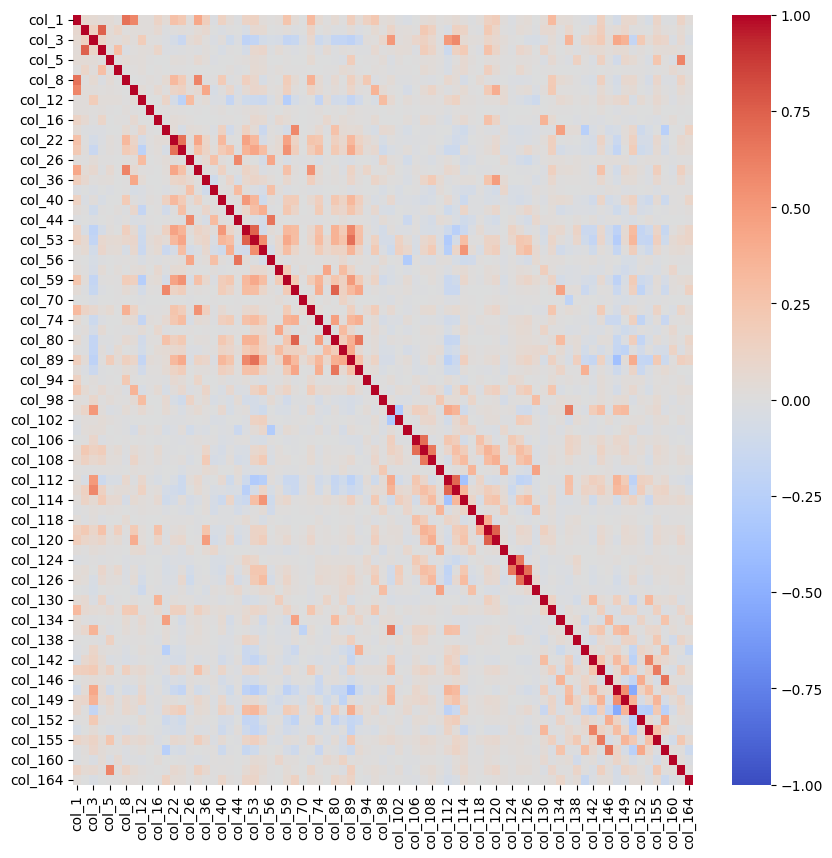

In [ ]:
# Let's check correlation for this data set

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
#plt.xticks([])
#plt.yticks([])
plt.show()

**ML**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
final["class"]=final["class"].astype("int")# to apply statsmodels we must have numeric data types

In [ ]:
#check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = final.iloc[:,2:-1].columns
vif_data["VIF"] = [variance_inflation_factor(final.iloc[:,2:-1].values, i) for i in range(final.iloc[:,2:-1].shape[1])]

print(vif_data)

    feature       VIF
0     col_1  6.314806
1     col_2  2.704837
2     col_3  2.411080
3     col_4  3.159202
4     col_5  1.720889
..      ...       ...
72  col_155  2.578093
73  col_158  2.423307
74  col_160  1.091979
75  col_161  1.656883
76  col_164  1.117136

[77 rows x 2 columns]


In [ ]:
vif_data[vif_data["VIF"]>10]

,feature,VIF
21,col_52,30.223539
22,col_53,42.486645
23,col_54,16.767920
42,col_106,12.692199
43,col_107,23.232134
44,col_108,10.381671
46,col_112,38.933647
47,col_113,42.071256
48,col_114,16.254026
54,col_124,13.864193


Still we have some correlated columns. We have some VIF value greater then 10. We may drop them.





In [ ]:
drop_feat=vif_data[vif_data["VIF"]>10]["feature"]

In [ ]:
final.drop(columns=drop_feat,inplace=True)

In [ ]:
corr_mat1=final.iloc[:,2:-1].corr()

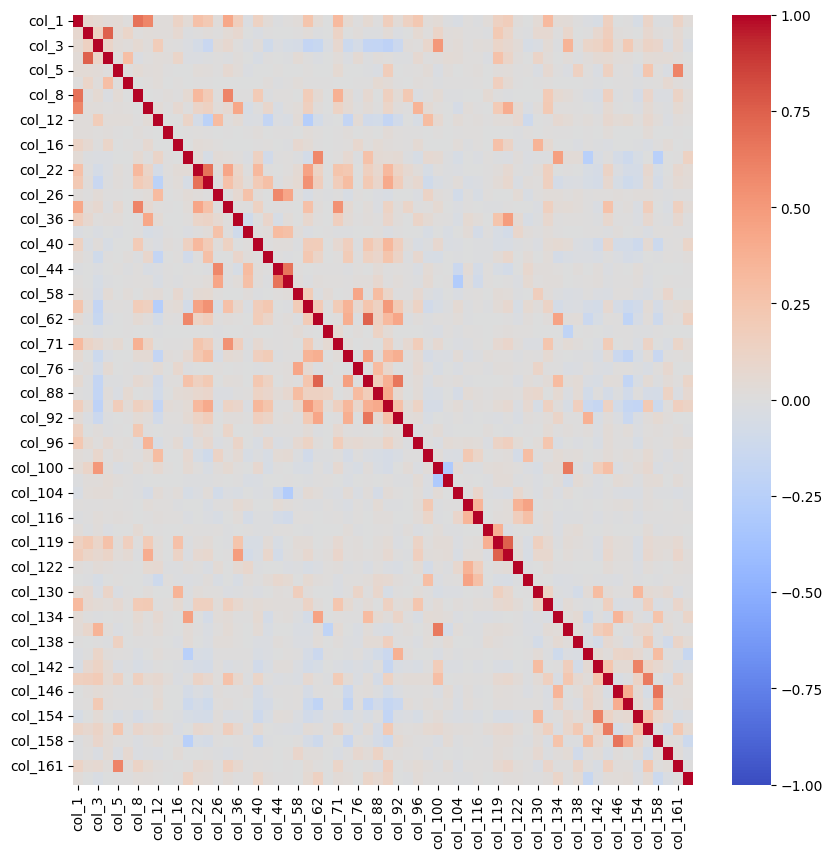

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat1, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
#plt.xticks([])
#plt.yticks([])
plt.show()

Now correlation matrix looks better.

In [ ]:
#Check if we have low varience column
low_variance_cols = final.iloc[:,2:-1].columns[final.iloc[:,2:-1].var() == 0]
print("Low variance columns:", low_variance_cols)
final.drop(columns=low_variance_cols,inplace=True)

Low variance columns: Index([], dtype='object')


**Check full data with statsmodel**





In [ ]:
final.iloc[:,2:-1]

,col_1,col_2,col_3,col_4,col_5,col_7,col_8,col_10,col_12,col_15,...,col_142,col_143,col_146,col_152,col_154,col_155,col_158,col_160,col_161,col_164
0,-0.172669,0.048298,-1.201369,-0.121970,-0.043875,-0.061584,-0.163319,-0.049707,-0.028741,-0.013282,...,0.060963,-0.386969,0.143001,0.185597,0.398638,-0.458316,0.241128,0.018279,-0.087490,-0.120613
1,-0.164417,0.048298,-1.201369,0.178180,-0.043875,-0.061584,-0.163580,-0.022718,-1.353307,-0.013282,...,-0.126628,-0.429352,1.301966,-1.116918,-0.193143,-0.513559,-0.979074,-0.098889,-0.087490,-1.760926
2,-0.164272,0.048298,-1.201369,0.028105,-0.043875,-0.061584,-0.163191,-0.016812,2.457052,-0.013282,...,-0.126628,1.240965,1.301966,0.185597,0.185597,1.585683,1.461330,0.018279,-0.087490,-0.120613
3,-0.168195,0.048298,-1.201369,-0.046932,-0.063725,-0.061584,-0.163574,-0.006824,2.459222,-0.013282,...,-0.161512,-0.455921,0.143001,0.185597,-0.193143,-0.611769,0.241128,-0.098889,-0.106715,-0.120613
4,-0.169109,0.048298,-1.201369,-0.046932,-0.043875,-0.061584,-0.162900,-0.027389,2.459222,-0.013282,...,0.194509,-0.192468,-1.015963,1.488113,0.327624,0.407161,-0.979074,-0.098889,-0.087490,1.519700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085,-0.172388,-0.184668,-1.201369,0.103143,-0.063725,-0.061584,-0.163494,-0.049706,2.002426,-0.013282,...,-0.168742,-0.458162,0.143001,0.185597,-0.193143,-0.611769,0.241128,0.018279,-0.087490,-0.120613
9086,0.023362,-0.184668,-1.201369,-0.046932,-0.043875,-0.061584,-0.079601,0.245696,-2.516705,-0.013282,...,-0.173906,-0.445357,1.301966,0.185597,-0.216814,-0.611769,1.461330,0.018279,-0.087490,-0.120613
9087,-0.157971,-0.132897,-1.201369,-0.046932,-0.043875,-0.061584,-0.163494,0.085902,-2.516705,-0.013282,...,-0.168742,-0.454961,-1.015963,0.185597,-0.193143,-0.599493,-0.979074,-0.098889,-0.087490,1.519700
9088,-0.122150,0.088777,1.573595,-0.121970,-0.043875,-0.061584,-0.111630,-0.049707,-0.028741,-0.013282,...,-0.059634,2.729708,-1.015963,-1.116918,-0.216814,-0.004094,-0.979074,0.018279,0.835284,-1.760926


In [ ]:
final.iloc[:,2:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9090 entries, 0 to 9089
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   col_1    9090 non-null   float64
 1   col_2    9090 non-null   float64
 2   col_3    9090 non-null   float64
 3   col_4    9090 non-null   float64
 4   col_5    9090 non-null   float64
 5   col_7    9090 non-null   float64
 6   col_8    9090 non-null   float64
 7   col_10   9090 non-null   float64
 8   col_12   9090 non-null   float64
 9   col_15   9090 non-null   float64
 10  col_16   9090 non-null   float64
 11  col_20   9090 non-null   float64
 12  col_22   9090 non-null   float64
 13  col_23   9090 non-null   float64
 14  col_26   9090 non-null   float64
 15  col_34   9090 non-null   float64
 16  col_36   9090 non-null   float64
 17  col_38   9090 non-null   float64
 18  col_40   9090 non-null   float64
 19  col_42   9090 non-null   float64
 20  col_44   9090 non-null   float64
 21  col_56   9090 

In [ ]:
final["class"]

0       0
1       0
2       0
3       0
4       0
       ..
9085    1
9086    1
9087    1
9088    1
9089    1
Name: class, Length: 9090, dtype: int64

In [ ]:
import statsmodels.api as sm
np.random.seed(42)
# Example data
X =final.iloc[:,2:-1]  # Feature matrix
y =final["class"]  # Target vector

# Add a constant to the features (for intercept)
#X = sm.add_constant(X)

# Fit the modelmodel =
#model=sm.GLM(y, X, family=sm.families.Binomial())
model = sm.Logit(y, X)
results = model.fit_regularized(maxiter=1000,method='l1')

# Print a summary of the regression results
print(results.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3449506072742825
            Iterations: 600
            Function evaluations: 635
            Gradient evaluations: 600
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 9090
Model:                          Logit   Df Residuals:                     9028
Method:                           MLE   Df Model:                           61
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.5023
Time:                        08:29:18   Log-Likelihood:                -3135.6
converged:                       True   LL-Null:                       -6300.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
X

,col_1,col_2,col_3,col_4,col_5,col_7,col_8,col_10,col_12,col_15,...,col_142,col_143,col_146,col_152,col_154,col_155,col_158,col_160,col_161,col_164
0,-0.172669,0.048298,-1.201369,-0.121970,-0.043875,-0.061584,-0.163319,-0.049707,-0.028741,-0.013282,...,0.060963,-0.386969,0.143001,0.185597,0.398638,-0.458316,0.241128,0.018279,-0.087490,-0.120613
1,-0.164417,0.048298,-1.201369,0.178180,-0.043875,-0.061584,-0.163580,-0.022718,-1.353307,-0.013282,...,-0.126628,-0.429352,1.301966,-1.116918,-0.193143,-0.513559,-0.979074,-0.098889,-0.087490,-1.760926
2,-0.164272,0.048298,-1.201369,0.028105,-0.043875,-0.061584,-0.163191,-0.016812,2.457052,-0.013282,...,-0.126628,1.240965,1.301966,0.185597,0.185597,1.585683,1.461330,0.018279,-0.087490,-0.120613
3,-0.168195,0.048298,-1.201369,-0.046932,-0.063725,-0.061584,-0.163574,-0.006824,2.459222,-0.013282,...,-0.161512,-0.455921,0.143001,0.185597,-0.193143,-0.611769,0.241128,-0.098889,-0.106715,-0.120613
4,-0.169109,0.048298,-1.201369,-0.046932,-0.043875,-0.061584,-0.162900,-0.027389,2.459222,-0.013282,...,0.194509,-0.192468,-1.015963,1.488113,0.327624,0.407161,-0.979074,-0.098889,-0.087490,1.519700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085,-0.172388,-0.184668,-1.201369,0.103143,-0.063725,-0.061584,-0.163494,-0.049706,2.002426,-0.013282,...,-0.168742,-0.458162,0.143001,0.185597,-0.193143,-0.611769,0.241128,0.018279,-0.087490,-0.120613
9086,0.023362,-0.184668,-1.201369,-0.046932,-0.043875,-0.061584,-0.079601,0.245696,-2.516705,-0.013282,...,-0.173906,-0.445357,1.301966,0.185597,-0.216814,-0.611769,1.461330,0.018279,-0.087490,-0.120613
9087,-0.157971,-0.132897,-1.201369,-0.046932,-0.043875,-0.061584,-0.163494,0.085902,-2.516705,-0.013282,...,-0.168742,-0.454961,-1.015963,0.185597,-0.193143,-0.599493,-0.979074,-0.098889,-0.087490,1.519700
9088,-0.122150,0.088777,1.573595,-0.121970,-0.043875,-0.061584,-0.111630,-0.049707,-0.028741,-0.013282,...,-0.059634,2.729708,-1.015963,-1.116918,-0.216814,-0.004094,-0.979074,0.018279,0.835284,-1.760926


In [ ]:
# We drop columns based on p value or coeficient
coefficients = results.params  # Exclude intercept
p_values = results.pvalues
conf_ints = results.conf_int()  # Exclude intercept

In [ ]:
significant_features_p = X.columns[(p_values < 0.05)]
significant_features_coe = X.columns[(np.abs(coefficients) > 0.3)]

In [ ]:
significant_features_p,significant_features_coe

(Index(['col_5', 'col_7', 'col_12', 'col_15', 'col_16', 'col_20', 'col_22',
        'col_23', 'col_34', 'col_40', 'col_42', 'col_56', 'col_58', 'col_74',
        'col_80', 'col_88', 'col_89', 'col_92', 'col_94', 'col_102', 'col_118',
        'col_119', 'col_130', 'col_138', 'col_140', 'col_142', 'col_154',
        'col_158', 'col_160', 'col_161', 'col_164'],
       dtype='object'),
 Index(['col_1', 'col_5', 'col_7', 'col_8', 'col_10', 'col_15', 'col_16',
        'col_22', 'col_23', 'col_34', 'col_40', 'col_42', 'col_58', 'col_59',
        'col_70', 'col_80', 'col_89', 'col_92', 'col_94', 'col_118', 'col_119',
        'col_130', 'col_142', 'col_154', 'col_158', 'col_160', 'col_161'],
       dtype='object'))

In [ ]:
features=list(significant_features_p)# I decide get rid of the columns with greater p-values
features.extend(['timestamps','class'])


In [ ]:
final=final.loc[:,features]

In [ ]:
final

,col_5,col_7,col_12,col_15,col_16,col_20,col_22,col_23,col_34,col_40,...,col_138,col_140,col_142,col_154,col_158,col_160,col_161,col_164,timestamps,class
0,-0.043875,-0.061584,-0.028741,-0.013282,-0.056486,-1.373657,-0.139731,-0.148912,-0.024669,-0.227178,...,-0.301754,0.183133,0.060963,0.398638,0.241128,0.018279,-0.087490,-0.120613,1,0
1,-0.043875,-0.061584,-1.353307,-0.013282,-0.056489,-1.373657,-0.139732,-0.148893,-0.024669,-0.227215,...,-0.062493,1.342003,-0.126628,-0.193143,-0.979074,-0.098889,-0.087490,-1.760926,1,0
2,-0.043875,-0.061584,2.457052,-0.013282,-0.056489,-1.373657,-0.139726,-0.148898,-0.024669,-0.227168,...,-0.285263,1.342003,-0.126628,0.185597,1.461330,0.018279,-0.087490,-0.120613,1,0
3,-0.063725,-0.061584,2.459222,-0.013282,0.011805,-0.243300,-0.139721,-0.148898,-0.024669,-0.227149,...,-0.301754,0.183133,-0.161512,-0.193143,0.241128,-0.098889,-0.106715,-0.120613,1,0
4,-0.043875,-0.061584,2.459222,-0.013282,-0.056488,-1.373657,-0.139726,-0.148908,-0.024669,-0.227178,...,-0.285950,1.342003,0.194509,0.327624,-0.979074,-0.098889,-0.087490,1.519700,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085,-0.063725,-0.061584,2.002426,-0.013282,-0.048798,-0.243300,-0.139571,-0.148744,-0.024669,-0.226941,...,-0.301754,0.183133,-0.168742,-0.193143,0.241128,0.018279,-0.087490,-0.120613,6,1
9086,-0.043875,-0.061584,-2.516705,-0.013282,0.263417,-1.373657,5.021244,3.353530,-0.024669,1.497597,...,0.564863,-0.975738,-0.173906,-0.216814,1.461330,0.018279,-0.087490,-0.120613,6,1
9087,-0.043875,-0.061584,-2.516705,-0.013282,-0.054176,-1.373657,-0.139717,-0.148862,-0.024669,-0.227149,...,-0.301273,1.342003,-0.168742,-0.193143,-0.979074,-0.098889,-0.087490,1.519700,6,1
9088,-0.043875,-0.061584,-0.028741,-0.013282,-0.046897,0.887058,-0.139710,-0.148898,-0.024669,-0.227215,...,-0.301754,0.183133,-0.059634,-0.216814,-0.979074,0.018279,0.835284,-1.760926,46,1


In [ ]:
import statsmodels.api as sm
np.random.seed(42)
# Example data
X =final.iloc[:,:-2]  # Feature matrix
y =final["class"]  # Target vector

# Add a constant to the features (for intercept)
#X = sm.add_constant(X)

# Fit the modelmodel =
#model=sm.GLM(y, X, family=sm.families.Binomial())
model = sm.Logit(y, X)
results = model.fit_regularized(maxiter=1000,method='l1')

# Print a summary of the regression results
print(results.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3503578992585531
            Iterations: 285
            Function evaluations: 295
            Gradient evaluations: 285
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 9090
Model:                          Logit   Df Residuals:                     9059
Method:                           MLE   Df Model:                           30
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.4945
Time:                        08:29:20   Log-Likelihood:                -3184.8
converged:                       True   LL-Null:                       -6300.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
X

,col_5,col_7,col_12,col_15,col_16,col_20,col_22,col_23,col_34,col_40,...,col_119,col_130,col_138,col_140,col_142,col_154,col_158,col_160,col_161,col_164
0,-0.043875,-0.061584,-0.028741,-0.013282,-0.056486,-1.373657,-0.139731,-0.148912,-0.024669,-0.227178,...,-0.176617,0.034682,-0.301754,0.183133,0.060963,0.398638,0.241128,0.018279,-0.087490,-0.120613
1,-0.043875,-0.061584,-1.353307,-0.013282,-0.056489,-1.373657,-0.139732,-0.148893,-0.024669,-0.227215,...,-0.115534,-0.091535,-0.062493,1.342003,-0.126628,-0.193143,-0.979074,-0.098889,-0.087490,-1.760926
2,-0.043875,-0.061584,2.457052,-0.013282,-0.056489,-1.373657,-0.139726,-0.148898,-0.024669,-0.227168,...,-0.115534,-0.065979,-0.285263,1.342003,-0.126628,0.185597,1.461330,0.018279,-0.087490,-0.120613
3,-0.063725,-0.061584,2.459222,-0.013282,0.011805,-0.243300,-0.139721,-0.148898,-0.024669,-0.227149,...,-0.176617,-0.085726,-0.301754,0.183133,-0.161512,-0.193143,0.241128,-0.098889,-0.106715,-0.120613
4,-0.043875,-0.061584,2.459222,-0.013282,-0.056488,-1.373657,-0.139726,-0.148908,-0.024669,-0.227178,...,-0.176617,-0.120964,-0.285950,1.342003,0.194509,0.327624,-0.979074,-0.098889,-0.087490,1.519700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085,-0.063725,-0.061584,2.002426,-0.013282,-0.048798,-0.243300,-0.139571,-0.148744,-0.024669,-0.226941,...,-0.176617,-0.111389,-0.301754,0.183133,-0.168742,-0.193143,0.241128,0.018279,-0.087490,-0.120613
9086,-0.043875,-0.061584,-2.516705,-0.013282,0.263417,-1.373657,5.021244,3.353530,-0.024669,1.497597,...,0.983960,-0.066085,0.564863,-0.975738,-0.173906,-0.216814,1.461330,0.018279,-0.087490,-0.120613
9087,-0.043875,-0.061584,-2.516705,-0.013282,-0.054176,-1.373657,-0.139717,-0.148862,-0.024669,-0.227149,...,-0.176617,-0.116173,-0.301273,1.342003,-0.168742,-0.193143,-0.979074,-0.098889,-0.087490,1.519700
9088,-0.043875,-0.061584,-0.028741,-0.013282,-0.046897,0.887058,-0.139710,-0.148898,-0.024669,-0.227215,...,-0.176617,0.006994,-0.301754,0.183133,-0.059634,-0.216814,-0.979074,0.018279,0.835284,-1.760926


In [ ]:
#check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = final.iloc[:,:-1].columns
vif_data["VIF"] = [variance_inflation_factor(final.iloc[:,:-1].values, i) for i in range(final.iloc[:,:-1].shape[1])]

print(vif_data)

       feature       VIF
0        col_5  1.609824
1        col_7  1.047781
2       col_12  1.129434
3       col_15  3.317577
4       col_16  1.257865
5       col_20  1.314387
6       col_22  2.447943
7       col_23  2.405933
8       col_34  1.288456
9       col_40  1.295503
10      col_42  1.235965
11      col_56  1.012696
12      col_58  1.153456
13      col_74  1.487400
14      col_80  2.571495
15      col_88  1.447059
16      col_89  2.039325
17      col_92  2.585063
18      col_94  1.016671
19     col_102  1.010850
20     col_118  1.206524
21     col_119  1.370581
22     col_130  1.427453
23     col_138  1.098953
24     col_140  1.602388
25     col_142  1.735673
26     col_154  1.799694
27     col_158  1.223410
28     col_160  1.062203
29     col_161  1.608876
30     col_164  1.070469
31  timestamps  3.402518


we have good VIF values.

In [ ]:
# We do splitting for traning and test based on timestamps.
#We choose timestamp 32 to have good ratio between train and tes
Train_x=final[final["timestamps"]<32].iloc[:,:-1]
Train_y=final[final["timestamps"]<32]["class"]
Test_x=final[final["timestamps"]>=32].iloc[:,:-1]
Test_y=final[final["timestamps"]>=32]["class"]

In [ ]:
Train_x.head()

,col_5,col_7,col_12,col_15,col_16,col_20,col_22,col_23,col_34,col_40,...,col_130,col_138,col_140,col_142,col_154,col_158,col_160,col_161,col_164,timestamps
0,-0.043875,-0.061584,-0.028741,-0.013282,-0.056486,-1.373657,-0.139731,-0.148912,-0.024669,-0.227178,...,0.034682,-0.301754,0.183133,0.060963,0.398638,0.241128,0.018279,-0.087490,-0.120613,1
1,-0.043875,-0.061584,-1.353307,-0.013282,-0.056489,-1.373657,-0.139732,-0.148893,-0.024669,-0.227215,...,-0.091535,-0.062493,1.342003,-0.126628,-0.193143,-0.979074,-0.098889,-0.087490,-1.760926,1
2,-0.043875,-0.061584,2.457052,-0.013282,-0.056489,-1.373657,-0.139726,-0.148898,-0.024669,-0.227168,...,-0.065979,-0.285263,1.342003,-0.126628,0.185597,1.461330,0.018279,-0.087490,-0.120613,1
3,-0.063725,-0.061584,2.459222,-0.013282,0.011805,-0.243300,-0.139721,-0.148898,-0.024669,-0.227149,...,-0.085726,-0.301754,0.183133,-0.161512,-0.193143,0.241128,-0.098889,-0.106715,-0.120613,1
4,-0.043875,-0.061584,2.459222,-0.013282,-0.056488,-1.373657,-0.139726,-0.148908,-0.024669,-0.227178,...,-0.120964,-0.285950,1.342003,0.194509,0.327624,-0.979074,-0.098889,-0.087490,1.519700,1


In [ ]:
Train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
model = LogisticRegression(max_iter=1000,random_state=42)  # Initialize logistic regression model
result=model.fit(Train_x, Train_y)

In [ ]:
y_pred=model.predict(Test_x)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

MODEL EVALUTİON

In [ ]:
#report for full data
print("Classification report:")
print(classification_report(Test_y, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1485
           1       0.86      0.70      0.77      1485

    accuracy                           0.79      2970
   macro avg       0.80      0.79      0.79      2970
weighted avg       0.80      0.79      0.79      2970



Based on the report above we can sya that we are good to catch illicit cases with recall 0.89.

In [ ]:
conf_mat = confusion_matrix(Test_y, y_pred) #get confusion matrix
print("Confusion Matrix:")
print(conf_mat)


Confusion Matrix:
[[1315  170]
 [ 443 1042]]


Lets try with these features and make more model

In [ ]:
# This time we use randomforest
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)


In [ ]:
rf_classifier.fit(Train_x, Train_y)
y_pred = rf_classifier.predict(Test_x)


In [ ]:
print(classification_report(Test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1485
           1       0.83      0.97      0.90      1485

    accuracy                           0.89      2970
   macro avg       0.90      0.89      0.89      2970
weighted avg       0.90      0.89      0.89      2970



Based on the above report we can say that we improved our precision and recall for 0 and 1 respectively but still catching illicit is not better here.

In [ ]:
conf_mat = confusion_matrix(Test_y, y_pred) #get confusion matrix
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[1193  292]
 [  38 1447]]


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42) # Again we do gridsearch for better performance


In [ ]:
'''param_grid = {
    'n_estimators': [100,300,500,1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node

}
'''

"param_grid = {\n    'n_estimators': [100,300,500,1000],  # Number of trees in the forest\n    'max_depth': [None, 10, 20],  # Maximum depth of the trees\n    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node\n    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node\n\n}\n"

In [ ]:
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
#grid_search.fit(Train_x, Train_y)


In [ ]:
'''
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
'''

'\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Score:", best_score)\n'

In [ ]:
'''best_model = grid_search.best_estimator_
y_pred = best_model.predict(Test_x)
'''

'best_model = grid_search.best_estimator_\ny_pred = best_model.predict(Test_x)\n'

In [ ]:
print(classification_report(Test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1485
           1       0.83      0.97      0.90      1485

    accuracy                           0.89      2970
   macro avg       0.90      0.89      0.89      2970
weighted avg       0.90      0.89      0.89      2970



Our model did not make any significant change with the grid search also.

In [ ]:
conf_mat = confusion_matrix(Test_y, y_pred) #get confusion matrix
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[1193  292]
 [  38 1447]]


In [ ]:
#Change number of estimator
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)


In [ ]:
rf_classifier.fit(Train_x, Train_y)
y_pred = rf_classifier.predict(Test_x)

In [ ]:
print(classification_report(Test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1485
           1       0.83      0.98      0.90      1485

    accuracy                           0.89      2970
   macro avg       0.90      0.89      0.89      2970
weighted avg       0.90      0.89      0.89      2970



In [ ]:
#Change criterion
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion="log_loss",random_state=42) # change criterion.


In [ ]:
rf_classifier.fit(Train_x, Train_y)
y_pred = rf_classifier.predict(Test_x)

In [ ]:
print(classification_report(Test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1485
           1       0.83      0.97      0.90      1485

    accuracy                           0.89      2970
   macro avg       0.90      0.89      0.89      2970
weighted avg       0.90      0.89      0.89      2970



Although it improved it is not significant change.

In [ ]:
# Apply XGBoost model
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(Train_x, label=Train_y)
dtest = xgb.DMatrix(Test_x, label=Test_y)

In [ ]:
params = {
    'objective': 'binary:logistic', # Binary classification
    'max_depth': 4,
    'eta': 0.1,  # Learning rate
    'eval_metric': 'logloss',  # Evaluation metric
    'verbosity': 1
}

In [ ]:
num_rounds = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds)

In [ ]:
# Predict using the test data
y_pred_prob = bst.predict(dtest)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

In [ ]:
# Classification report
class_report = classification_report(Test_y, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1485
           1       0.84      0.96      0.90      1485

    accuracy                           0.89      2970
   macro avg       0.90      0.89      0.89      2970
weighted avg       0.90      0.89      0.89      2970



Based on the report we can say that we have almost the same values for this model also as RF

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(Test_y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1210  275]
 [  59 1426]]
